### The Machine Learning Tsunami

In 2006, Geoffrey Hinton en al. published a paper showing how to train a deep neural network capable of recognizing handwritten digits with state-of-the-art precision (>98%). They branded this technique "Deep Learning". A deep neural network is a (very) simplified model of out cerebral cortex, composed of a stack of layers of artificial neurons. Training a deep neural net was widely considered impossible at the time, and most researchers had abandoned the idea in the late 1990s.

### Chapter 1. The Machine Learning Landscape

#### Question #1: What is Machine Learning?

Machine Learning is the science (and art) of programming computers so they can learn from data.

Here is aslightly more general definition:
\[Machine Learning is the\] field of study that gives computers the ability to learn without being explicitly programmed.
Arthur Samuel, 1959

And a more engineering-oriented one:

A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.
Tom Mitchell, 1997



#### Question #2: Why use Machine Learning?

(Use case of spam filter)

In contrast to difficult set of rules and hardness to maintain manually programmed spam filter, a spam filter based on Machine Learning techniques automatically learns which words and phrases are good predictors of spam by dtecting unusually frequent pattern of words in the spam examples copared to the ham examples. The program is much shorter, easier to maintain, and most likely more accurate.

Applying ML techniques to dig into large amounts of data can help discover patterns that were not immediately apparent. This is called data mining.

#### Types of Machine Learning Systems

There are so many different types of Machine Learning systems that it is useful to classify them in broad categories, based on the following criteria:

1. Whether or not they are trained with human supervision (supervised, unsupervised, semisupervised, and Reinforcement Learning)
2. Whether or not they can learn incrementally on the fly (online versus batch learning)
3. Whether they work by simply comparing new data points to known data points, or instead by detecting patterns in the training data and building a predictive model, much like scientists do (instance-based versus model-based learning)

### Supervised/Unsupervised Learning

1. Supervised learning

In supervised learning, the training set you feed to the algorithm includes the desired solutions, called labels.

A typical supervised learning task is classification. Another typical task is to predict a target numeric value, such as the price of a car, given a set of features (mileage, age, brand, etc.) called predictors. This sort of task is called regression. To train the system, you need to give it many examples of cars, including both their predictors and their labels(i.e., their prices).

Note thai some regression algorithms can be used for classification as well, and vice versa. For example, Logistic Regression is commonly used for classification, as it can output a value that corresponds to the probability of belonging to a given class (e.g., 20% chance of being spam).

Here are some of the most important supervised learning algorithms:
+ k-Nearest Neighbors
+ Linear Regression
+ Logistic Regression
+ Support Vector Machines (SVMs)
+ Decision Trees and Random Forests
+ Neural networks

2. Unsupervised learning

In unsupervised learning, as you might guess, the training data is unlabeled. The system tries to learn without a teacher.

Here are some of the most important unsupervised learning algorithms:
+ Clustering: (K-Means, DBSCAN, Hierarchical Cluster Analysis or HCA)
+ Anomaly detection and novelty detection: (One-class SVM, Isolation Forest)
+ Visualization and dimensionality reduction: (Principal Component Analysis or PCA, Kernel PCA, Locally Linear Embedding or LLE, t-Distributed Stochastic Neighbor Embedding or t-SNE)
+ Association rule learning: (Apriori, Eclat)

3. Semisupervised learning

Since labeling data is usually time-consuming and costly, you will often have plenty of ulabeled instances, and few labeled instances. Some algorithms can deal with data that's partially labeled. This is called semisupervised learning. 

Most semisupervised learning algorithms are combinations of unsupervised and supervised algorithms. For example, deep belief networks (DBNs) are based on unsupervised components called restricted Boltzmann machines (RBMs) stacked on top of one another. RBMs are trained sequentially in an unsupervised manner, and then the whole system is fine-tuned using supervised learning techniques.

4. Reinforcement Learning

Reinforcement learning is a very different beast. The learning system, called an agent in this context, can observe the environment, select and perform actions, and get rewards in return (or penalties in the form of negative rewards). It must then learn by itself what is the best strategy, called a policy, to get the most reward over time. A policy defines what action the agent should choose when is is in a situation.

#### Example 1-1. Training and running a linear model using Scikit-Learn

In [69]:
import sys
assert sys.version_info >= (3, 5)

In [70]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [71]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [72]:
%matplotlib inline
import os
import matplotlib as mpl
datapath = os.path.join("datasets", "lifesat", "")
mpl.rc("axes", labelsize=14)
mpl.rc("xtick",labelsize=12)
mpl.rc("ytick",labelsize=12)

In [73]:
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv",
                 "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [74]:
!tree

.
├── 01.ipynb
├── 01_the_machine_learning_landscape.ipynb
├── datasets
│   └── lifesat
│       ├── gdp_per_capita.csv
│       ├── oecd_bli_2015.csv
│       ├── oecd_bli_new.csv
│       └── WEO_Data.xls
├── handson-ml2
│   ├── 01_the_machine_learning_landscape.ipynb
│   ├── 02_end_to_end_machine_learning_project.ipynb
│   ├── 03_classification.ipynb
│   ├── 04_training_linear_models.ipynb
│   ├── 05_support_vector_machines.ipynb
│   ├── 06_decision_trees.ipynb
│   ├── 07_ensemble_learning_and_random_forests.ipynb
│   ├── 08_dimensionality_reduction.ipynb
│   ├── 09_unsupervised_learning.ipynb
│   ├── 10_neural_nets_with_keras.ipynb
│   ├── 11_training_deep_neural_networks.ipynb
│   ├── 12_custom_models_and_training_with_tensorflow.ipynb
│   ├── 13_loading_and_preprocessing_data.ipynb
│   ├── 14_deep_computer_vision_with_cnns.ipynb
│   ├── 15_processing_sequences_using_rnns_and_cnns.ipynb
│   ├── 16_nlp_with_rnns_and_attention.ipynb
│   ├── 17_autoencoders_and_gans.ipynb
│   ├── 18_rein

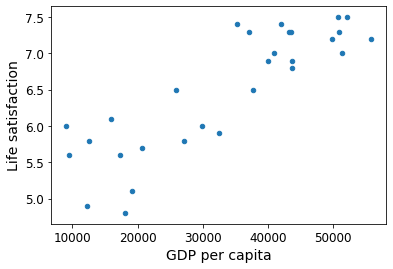

[[5.96242338]]


In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", 
                       thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",
                             thousands=',',
                             delimiter='\t',
                             encoding="latin1",
                             na_values="n/a")

country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot(kind="scatter",
                   x="GDP per capita", 
                   y="Life satisfaction")
plt.show()

model = sklearn.linear_model.LinearRegression()

model.fit(X, y)

X_new = [[22587]]
print(model.predict(X_new))

In [76]:
oecd_bli.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,3292.0,0.0,0.0,3292.000000
mean,0.0,NaN,NaN,4774.392587
std,0.0,NaN,NaN,13941.537833
min,0.0,NaN,NaN,0.000000
25%,0.0,NaN,NaN,6.600000
50%,0.0,NaN,NaN,49.000000
75%,0.0,NaN,NaN,90.000000
max,0.0,NaN,NaN,145769.000000


In [77]:
oecd_bli.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN


In [78]:
gdp_per_capita.describe()

,GDP per capita,Estimates Start After
count,187.000000,188.000000
mean,12590.961401,1969.250000
std,17387.035890,291.147823
min,220.860000,0.000000
25%,1783.538000,2011.000000
50%,5373.633000,2013.000000
75%,15490.576500,2014.000000
max,101994.093000,2015.000000


In [79]:
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [80]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)   

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [81]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
model.predict([[22587]])

array([[5.76666667]])

In [82]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [83]:
np.random.seed(42)

#### Load/prepare Life satisfaction data

In [84]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_new.csv", 
                       thousands=',')
print(oecd_bli["INEQUALITY"].unique())
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
print(oecd_bli["INEQUALITY"].unique())
print(oecd_bli["Indicator"].unique())

['TOT' 'MN' 'WMN' 'HGH' 'LW']
['TOT']
['Labour market insecurity'
 'Stakeholder engagement for developing regulations'
 'Dwellings without basic facilities' 'Housing expenditure'
 'Feeling safe walking alone at night' 'Rooms per person'
 'Household net adjusted disposable income' 'Household net wealth'
 'Employment rate' 'Long-term unemployment rate' 'Personal earnings'
 'Quality of support network' 'Educational attainment' 'Student skills'
 'Years in education' 'Air pollution' 'Water quality' 'Voter turnout'
 'Life expectancy' 'Self-reported health' 'Life satisfaction'
 'Homicide rate' 'Employees working very long hours'
 'Time devoted to leisure and personal care']


In [85]:
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0


In [86]:
oecd_bli.describe()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
count,41.000000,38.000000,40.000000,39.000000,41.000000,41.000000,41.000000,30.000000,28.000000,39.000000,...,36.000000,41.000000,38.000000,38.000000,39.000000,40.000000,23.000000,41.000000,41.000000,40.000000
mean,13.341463,5.057895,77.775000,8.029744,68.463415,68.253659,3.436585,28000.533333,294069.464286,20.641026,...,39912.611111,90.097561,1.636842,66.868421,2.166667,486.925000,15.080000,69.536585,82.341463,17.535000
std,5.699166,8.334093,14.936597,7.783618,7.871142,13.847186,6.254469,7012.870020,164153.120536,2.497232,...,12932.304171,4.253263,0.426438,14.092687,0.570933,31.382167,0.667717,12.060468,10.415397,1.392388
min,3.000000,0.000000,38.000000,0.140000,43.000000,35.600000,0.200000,16275.000000,70160.000000,15.000000,...,15314.000000,78.000000,0.900000,33.000000,1.200000,395.000000,13.830000,47.000000,55.000000,14.100000
25%,10.000000,0.325000,76.000000,3.360000,66.000000,60.000000,0.600000,21504.750000,190463.500000,19.000000,...,26017.750000,88.000000,1.200000,60.000000,1.750000,479.500000,14.630000,61.000000,75.000000,16.575000
50%,14.000000,0.950000,81.500000,5.250000,69.000000,70.100000,1.000000,29469.500000,269778.000000,21.000000,...,41628.000000,91.000000,1.650000,69.000000,2.200000,494.000000,14.920000,69.000000,84.000000,17.550000
75%,16.000000,6.625000,88.000000,11.050000,74.000000,77.700000,3.100000,32395.250000,386633.000000,22.500000,...,49263.250000,93.000000,1.900000,75.750000,2.550000,506.000000,15.590000,79.000000,91.000000,18.300000
max,28.000000,37.000000,94.000000,32.640000,86.000000,90.100000,26.700000,45284.000000,769053.000000,26.000000,...,63062.000000,98.000000,2.600000,88.000000,3.200000,529.000000,16.470000,91.000000,99.000000,21.000000


#### Load/prepare GDP per capita data

In [87]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv",
                             thousands=',',
                             delimiter='\t',
                             encoding='latin1',
                             na_values="n/a")

gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [88]:
gdp_per_capita.describe()

,GDP per capita,Estimates Start After
count,187.000000,188.000000
mean,12590.961401,1969.250000
std,17387.035890,291.147823
min,220.860000,0.000000
25%,1783.538000,2011.000000
50%,5373.633000,2013.000000
75%,15490.576500,2014.000000
max,101994.093000,2015.000000


In [89]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats.head(2)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,73.0,18.12,43.0,36.1,13.7,NaN,NaN,18.0,...,14.92,73.0,67.0,NaN,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.572,2014.0
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,53.0,75.0,14.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6083.510,2014.0


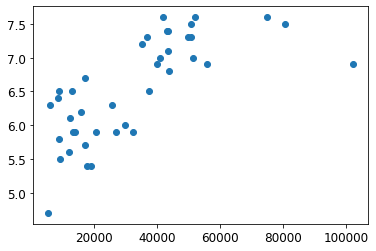

In [90]:
plt.scatter(x=full_country_stats["GDP per capita"], y=full_country_stats["Life satisfaction"])
plt.show()

In [91]:
remove_indices = [0, 1, 8, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

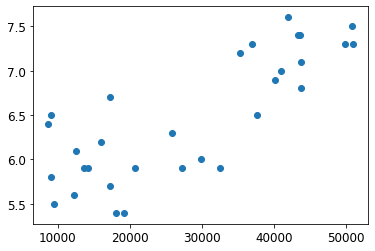

In [92]:
plt.scatter(x=sample_data["GDP per capita"], y=sample_data["Life satisfaction"])
plt.show()

In [93]:
missing_data

,GDP per capita,Life satisfaction
Country,,
South Africa,5694.572,4.7
Colombia,6083.510,6.3
Chile,13340.905,6.5
Ireland,51350.744,7.0
Denmark,52114.165,7.6


Saving figure money_happy_scatterplot


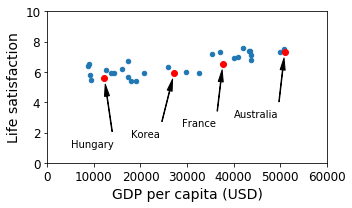

In [107]:

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    #"United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
save_fig('money_happy_scatterplot')
plt.show()

In [98]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [99]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,5.6
Korea,27195.197,5.9
France,37675.006,6.5
Australia,50961.865,7.3


In [100]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(5.3603890517165445, 3.9258722613056546e-05)

Saving figure best_fit_model_plot


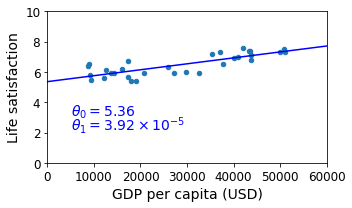

In [109]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 5.36$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 3.92 \times 10^{-5}$", fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()